# Weather Data

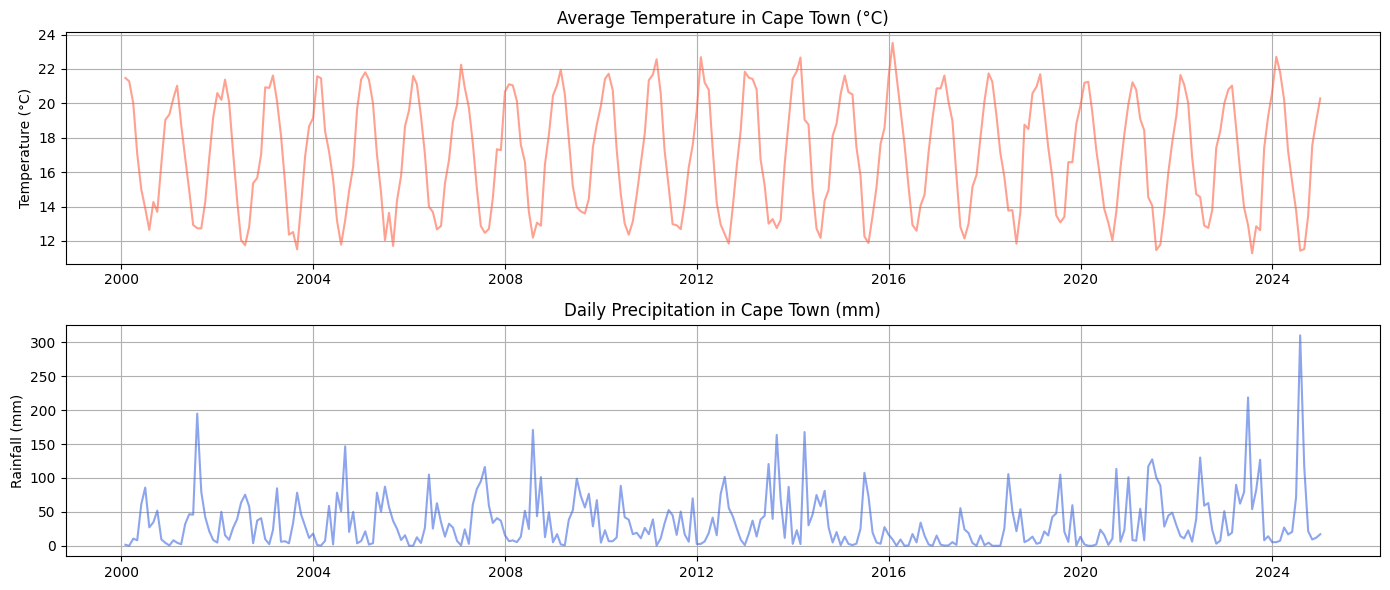

In [13]:
from meteostat import Point, Daily
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Define Cape Town coordinates
cape_town = Point(-33.9258, 18.4232)

# Time range: last 20 years
start = datetime(2000, 1, 1)
end = datetime(2024, 12, 31)

# Fetch daily weather data
data = Daily(cape_town, start, end)
data = data.fetch()

# Filter for average temperature and precipitation
df = data[['tavg', 'prcp']].copy()

# resample monthly
monthly = df.resample('M').mean()
monthly['prcp'] = df['prcp'].resample('M').sum()

# resample yearly
yearly = df.resample('M').mean()
yearly['prcp'] = df['prcp'].resample('M').sum()

# Convert tavg from °C x10 to °C if needed (Meteostat sometimes returns °C directly)
# df['tavg'] = df['tavg'] / 10

# Plotting
plt.figure(figsize=(14, 6))

# Plot tavg
plt.subplot(2, 1, 1)
plt.plot(monthly.index, monthly['tavg'], color='tomato', alpha=0.6)
plt.title('Average Temperature in Cape Town (°C)')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Plot prcp
plt.subplot(2, 1, 2)
plt.plot(monthly.index, monthly['prcp'], color='royalblue', alpha=0.6)
plt.title('Daily Precipitation in Cape Town (mm)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)

plt.tight_layout()
plt.show()



In [3]:
print(data.head)

<bound method NDFrame.head of             tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2000-01-01  17.0  11.3  22.5   NaN   NaN  184.0  26.4   NaN     NaN   NaN
2000-01-02  20.1  15.7  26.1   0.0   NaN  157.0  36.4   NaN     NaN   NaN
2000-01-03  22.6  13.9  31.0   0.0   NaN  185.0  17.0   NaN     NaN   NaN
2000-01-04  24.7  13.9  35.7   0.0   NaN    NaN   NaN   NaN     NaN   NaN
2000-01-05  22.1  18.7  35.7   0.0   NaN  194.0  26.2   NaN     NaN   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2024-12-27  22.3  17.4  25.3   0.2   NaN  354.0  21.4   NaN  1012.3   NaN
2024-12-28  22.8  16.3  28.9   0.0   NaN  215.0  19.9   NaN  1011.8   NaN
2024-12-29  20.6  16.7  30.2   0.1   NaN  334.0  20.6   NaN  1012.0   NaN
2024-12-30  20.4  17.6  24.7   1.3   NaN  341.0  30.5   NaN  1011.9   NaN
2024-12-31  19.7  15.7  25.1   0.0   NaN  297.0  15.9   NaN  1015.9   NaN

[9132 r

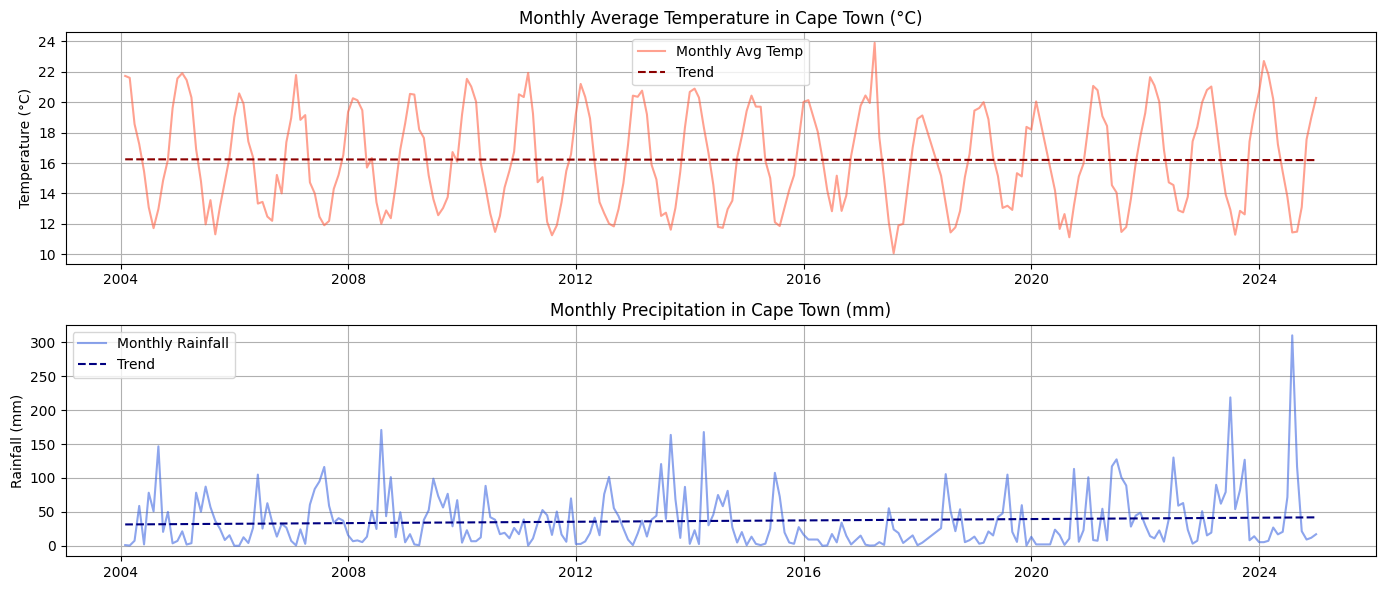

In [8]:
from meteostat import Point, Daily
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define Cape Town coordinates
cape_town = Point(-33.9258, 18.4232)

# Time range
start = datetime(2004, 1, 1)
end = datetime(2024, 12, 31)

# Fetch daily weather data
data = Daily(cape_town, start, end)
data = data.fetch()

# Drop missing values
df = data[['tavg', 'prcp']].dropna()

# Resample to monthly: average temp, total rainfall
monthly = df.resample('M').agg({'tavg': 'mean', 'prcp': 'sum'}).dropna()

# Convert index to numeric for regression
x = monthly.index.map(datetime.toordinal)

# Linear regression: temperature
z_temp = np.polyfit(x, monthly['tavg'], 1)
trend_temp = np.poly1d(z_temp)

# Linear regression: rainfall
z_rain = np.polyfit(x, monthly['prcp'], 1)
trend_rain = np.poly1d(z_rain)

# Plotting
plt.figure(figsize=(14, 6))

# Temperature
plt.subplot(2, 1, 1)
plt.plot(monthly.index, monthly['tavg'], color='tomato', alpha=0.6, label='Monthly Avg Temp')
plt.plot(monthly.index, trend_temp(x), color='darkred', linestyle='--', label='Trend')
plt.title('Monthly Average Temperature in Cape Town (°C)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# Rainfall
plt.subplot(2, 1, 2)
plt.plot(monthly.index, monthly['prcp'], color='royalblue', alpha=0.6, label='Monthly Rainfall')
plt.plot(monthly.index, trend_rain(x), color='navy', linestyle='--', label='Trend')
plt.title('Monthly Precipitation in Cape Town (mm)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

